In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sandp500/merge.sh
/kaggle/input/sandp500/getSandP.py
/kaggle/input/sandp500/all_stocks_5yr.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._.DS_Store
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._ABC_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._AAPL_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._A_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._MAS_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/CL_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/FDX_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AMAT_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/GLW_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/ANSS_data.csv
/kaggle/input/sandp500/individual_stock

In [16]:
import os
import pandas as pd

def load_and_add_industry(file_path, industry_mapping):
    df = pd.read_csv(file_path)
    df.rename(columns={'date': 'Date', 'close': 'Close'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['Return'] = df['Close'].pct_change()
    df.dropna(inplace=True)
    return df

# Define the industry mapping
industry_mapping = {
    'CL': 'Consumer Staples',
    'FDX': 'Industrials',
    'AMAT': 'Information Technology',
    'GLW': 'Information Technology',
    'ANSS': 'Information Technology',
    'DVN': 'Energy',
    'CBG': 'Real Estate',
    'TSS': 'Information Technology',
    'JEC': 'Industrials',
    'VRTX': 'Health Care',
    'FBHS': 'Consumer Discretionary',
    'AOS': 'Industrials',
    'MSI': 'Information Technology',
    'SBAC': 'Real Estate',
    'MNST': 'Consumer Staples',
    'CHRW': 'Industrials',
    'NRG': 'Utilities',
    'NLSN': 'Communication Services',
    'NDAQ': 'Financials',
    'GOOG': 'Communication Services',
    'DHR': 'Health Care',
    'PDCO': 'Health Care',
    'AMZN': 'Consumer Discretionary',
    'SRCL': 'Health Care',
    'ALLE': 'Industrials',
    'MCHP': 'Information Technology',
    'CERN': 'Health Care',
    'PXD': 'Energy',
    'NOC': 'Industrials',
    'STI': 'Financials',
    'CBS': 'Communication Services',
    'SPG': 'Real Estate',
    'AJG': 'Financials',
    'XEC': 'Energy',
    'XL': 'Financials',
    'LLY': 'Health Care',
    'GGP': 'Real Estate',
    'SIG': 'Consumer Discretionary',
    'KMX': 'Consumer Discretionary',
    'ALL': 'Financials',
    'DFS': 'Financials',
    'UPS': 'Industrials',
    'HOLX': 'Health Care',
    'UNM': 'Financials',
    'NI': 'Utilities',
    'AYI': 'Industrials',
    'BA': 'Industrials',
    'HES': 'Energy',
    'PLD': 'Real Estate',
    'PVH': 'Consumer Discretionary',
    'PRU': 'Financials',
    'PCG': 'Utilities',
    'APC': 'Energy',
    'ALK': 'Industrials',
    'PBCT': 'Financials',
    'AGN': 'Health Care',
    'CAH': 'Health Care',
    'MAA': 'Real Estate',
    'DRI': 'Consumer Discretionary',
    'ADM': 'Consumer Staples',
    'CHD': 'Consumer Staples',
    'RJF': 'Financials',
    'INTU': 'Information Technology',
    'MDLZ': 'Consumer Staples',
    'MO': 'Consumer Staples',
    'TROW': 'Financials',
    'VMC': 'Materials',
    'GILD': 'Health Care',
    'VLO': 'Energy',
    'FLR': 'Industrials',
    'LOW': 'Consumer Discretionary',
    'UNP': 'Industrials',
    'A': 'Health Care',
    'HOG': 'Consumer Discretionary',
    'TSCO': 'Consumer Discretionary',
    'GM': 'Consumer Discretionary',
    'NFLX': 'Communication Services',
    'PFE': 'Health Care',
    'PPL': 'Utilities',
    'EVHC': 'Health Care',
    'HAL': 'Energy',
    'DG': 'Consumer Discretionary',
    'MRO': 'Energy',
    'FISV': 'Information Technology',
    'L': 'Financials',
    'HRL': 'Consumer Staples',
    'TEL': 'Information Technology',
    'ISRG': 'Health Care',
    'NUE': 'Materials',
    'KEY': 'Financials',
    'TXT': 'Industrials',
    'FE': 'Utilities',
    'UTX': 'Industrials',
    'GE': 'Industrials',
    'CPB': 'Consumer Staples',
    'GRMN': 'Consumer Discretionary',
    'SRE': 'Utilities',
    'VRSN': 'Information Technology',
    'HCP': 'Real Estate',
    'GPS': 'Consumer Discretionary',
    'CBOE': 'Financials',
    'DVA': 'Health Care',
    'CHK': 'Energy',
    'FRT': 'Real Estate',
    'FFIV': 'Information Technology',
    'REGN': 'Health Care',
    'DXC': 'Information Technology',
    'LH': 'Health Care',
    'MAC': 'Real Estate',
    'IQV': 'Health Care',
    'BLK': 'Financials',
    'FMC': 'Materials',
    'RE': 'Financials',
    'IVZ': 'Financials',
    'ORCL': 'Information Technology',
    'NWL': 'Consumer Discretionary',
    'CMG': 'Consumer Discretionary',
    'NOV': 'Energy',
    'ADBE': 'Information Technology',
    'GD': 'Industrials',
    'PWR': 'Industrials'
}

# Directory containing the CSV files
directory = '/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/'

# Load all CSV files and add industry information
all_data = []
for file_name in os.listdir(directory):
    if file_name.endswith('_data.csv'):
        file_path = os.path.join(directory, file_name)
        df = load_and_add_industry(file_path, industry_mapping)
        symbol = os.path.basename(file_path).split('_')[0]  # Extract stock symbol
        df['Symbol'] = symbol
        df['Industry'] = industry_mapping.get(symbol, 'Unknown')  # Add industry based on symbol
        all_data.append(df[['Return', 'Industry']])

# Combine all data into a single DataFrame
combined_data = pd.concat(all_data, axis=0)


In [18]:
import numpy as np

def calculate_var_cvar(returns, confidence_level=0.95):
    sorted_returns = returns.sort_values()
    var = np.percentile(sorted_returns, (1 - confidence_level) * 100)
    cvar = sorted_returns[sorted_returns <= var].mean()
    return var, cvar

# Calculate VaR and CVaR for each industry
industry_groups = combined_data.groupby('Industry')
industry_var_cvar = {}

for industry, group in industry_groups:
    var, cvar = calculate_var_cvar(group['Return'])
    industry_var_cvar[industry] = {'VaR': var, 'CVaR': cvar}

print(pd.DataFrame(industry_var_cvar).T)


                             VaR      CVaR
Communication Services -0.024423 -0.038996
Consumer Discretionary -0.024055 -0.039568
Consumer Staples       -0.018180 -0.029272
Energy                 -0.037313 -0.056799
Financials             -0.019755 -0.029845
Health Care            -0.022968 -0.036895
Industrials            -0.020992 -0.033244
Information Technology -0.020292 -0.032192
Materials              -0.025516 -0.035424
Real Estate            -0.021417 -0.031105
Unknown                -0.022836 -0.036376
Utilities              -0.020840 -0.035933


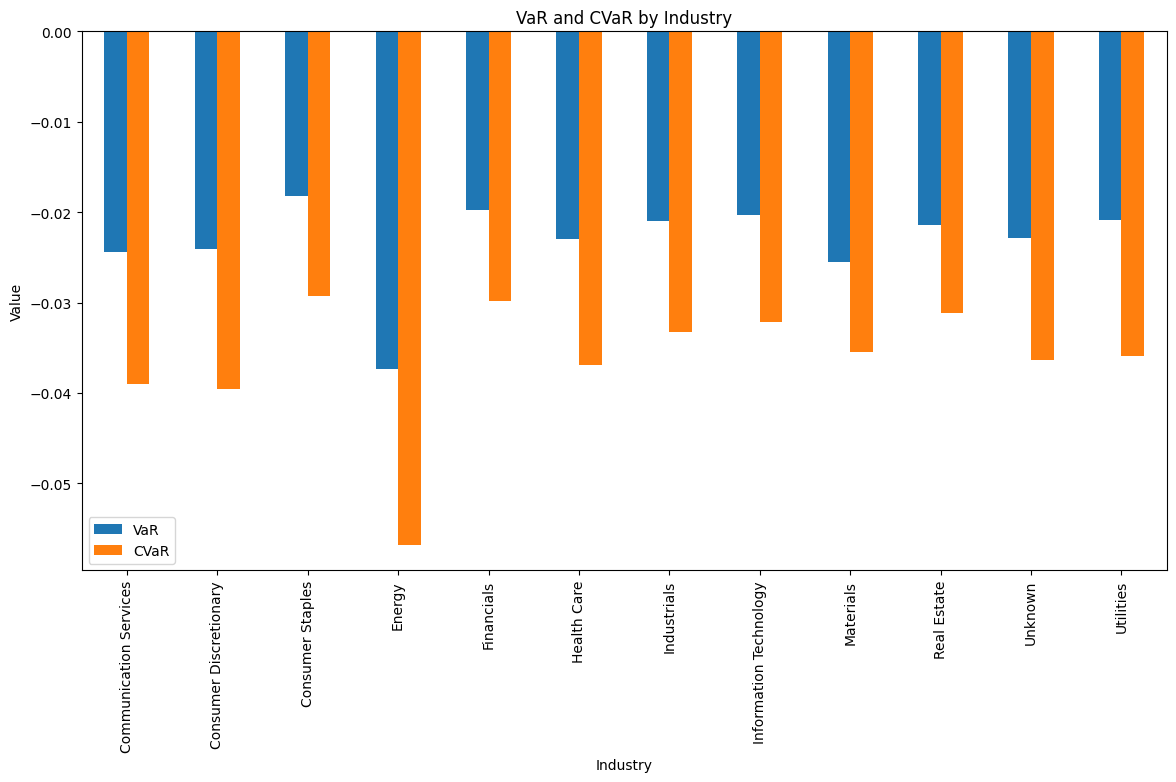

In [24]:
import matplotlib.pyplot as plt

df_var_cvar = pd.DataFrame(industry_var_cvar).T
df_var_cvar.plot(kind='bar', figsize=(14, 7))
plt.title('VaR and CVaR by Industry')
plt.ylabel('Value')
plt.xlabel('Industry')
plt.show()


Monte Carlo simulation

In [25]:
import numpy as np

def monte_carlo_var_cvar(returns, num_simulations=10000, confidence_level=0.95):
    # Estimate the parameters of the return distribution
    mean = returns.mean()
    std_dev = returns.std()
    
    # Generate simulated returns
    simulated_returns = np.random.normal(loc=mean, scale=std_dev, size=num_simulations)
    
    # Calculate VaR and CVaR from the simulated returns
    var = np.percentile(simulated_returns, (1 - confidence_level) * 100)
    cvar = simulated_returns[simulated_returns <= var].mean()
    
    return var, cvar


In [26]:
# Calculate VaR and CVaR using Monte Carlo simulation for each industry
industry_mc_var_cvar = {}

for industry, group in industry_groups:
    var, cvar = monte_carlo_var_cvar(group['Return'])
    industry_mc_var_cvar[industry] = {'Monte Carlo VaR': var, 'Monte Carlo CVaR': cvar}

print(pd.DataFrame(industry_mc_var_cvar).T)


                        Monte Carlo VaR  Monte Carlo CVaR
Communication Services        -0.029385         -0.037629
Consumer Discretionary        -0.028745         -0.035831
Consumer Staples              -0.021066         -0.026320
Energy                        -0.041661         -0.052155
Financials                    -0.021773         -0.026974
Health Care                   -0.026940         -0.033907
Industrials                   -0.023854         -0.030134
Information Technology        -0.022084         -0.028029
Materials                     -0.027260         -0.033803
Real Estate                   -0.021570         -0.027004
Unknown                       -0.025484         -0.031965
Utilities                     -0.027978         -0.034697


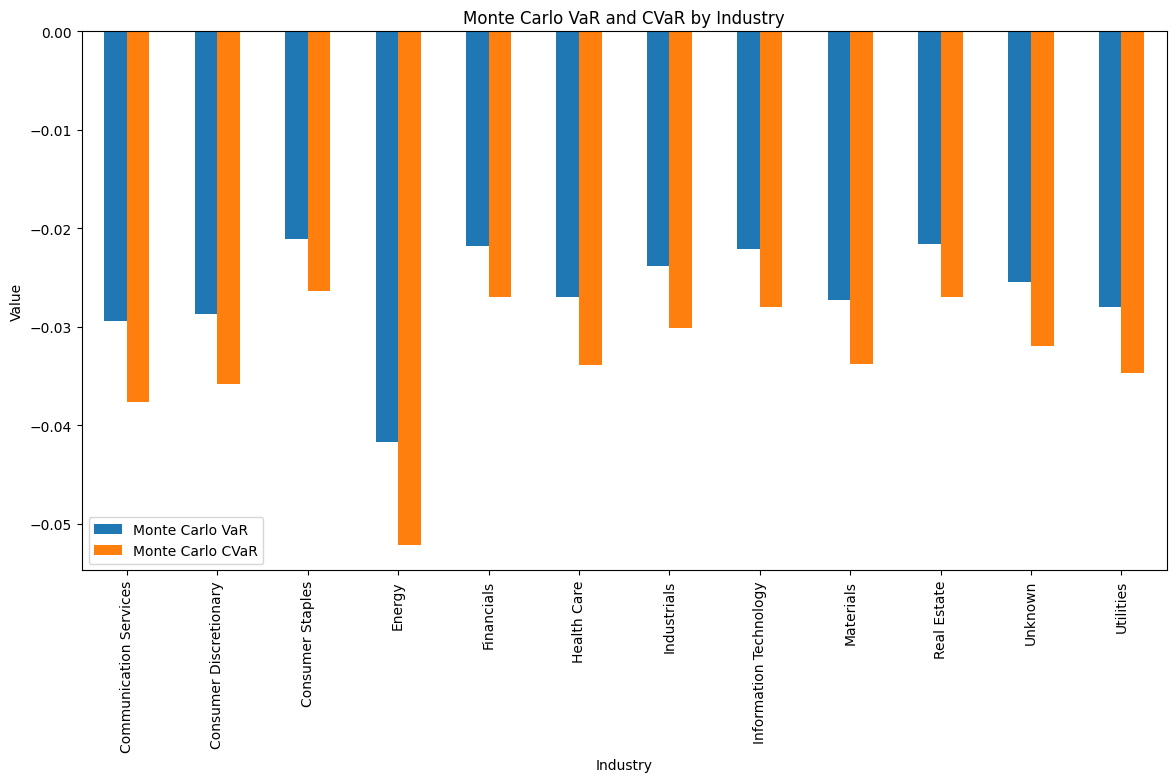

In [27]:
import matplotlib.pyplot as plt

df_mc_var_cvar = pd.DataFrame(industry_mc_var_cvar).T
df_mc_var_cvar.plot(kind='bar', figsize=(14, 7))
plt.title('Monte Carlo VaR and CVaR by Industry')
plt.ylabel('Value')
plt.xlabel('Industry')
plt.show()
